## Pandas and MySQL
*See additional reference on how to set up at the end of notebook*

**Using MySQL and the sample database “WORLD”, your tasks are:**
1. Translate the following SQL commands into Pandas library commands.
2. Make sure to compare results
3. Provide a description of what each SQL statement intends to do.

### world database sample 
* country
* City
* Language

GNP: Gross National Product - measure of a country's economic performance, or what its citizens produced (i.e. goods and services) and whether they produced these items within its borders.

In [2]:
##Import libraries and connect to MySQL World database
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pymysql

In [3]:
cnx = pymysql.connect(user='root', \
      password='sqlworld', \
      host= '127.0.0.1', \
      port=3306, \
      db='world', \
      autocommit=True)

**1.
select *
from country
where population > 50000000
order by population DESC limit 10**

In [4]:
#The sql statement filters countries by those who have population above 50m, sort them by pop and take the top 10
df_country = pd.read_sql_query('select * from Country', con=cnx,index_col='Code')

df_country[(df_country.Population > 50000000)].sort_values(by='Population', ascending = False)[:10]

,Name,Continent,Region,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,LocalName,GovernmentForm,HeadOfState,Capital,Code2
Code,,,,,,,,,,,,,,
CHN,China,Asia,Eastern Asia,9572900.0,-1523.0,1277558000,71.4,982268.0,917719.0,Zhongquo,People'sRepublic,Jiang Zemin,1891.0,CN
IND,India,Asia,Southern and Central Asia,3287263.0,1947.0,1013662000,62.5,447114.0,430572.0,Bharat/India,Federal Republic,Kocheril Raman Narayanan,1109.0,IN
USA,United States,North America,North America,9363520.0,1776.0,278357000,77.1,8510700.0,8110900.0,United States,Federal Republic,George W. Bush,3813.0,US
IDN,Indonesia,Asia,Southeast Asia,1904569.0,1945.0,212107000,68.0,84982.0,215002.0,Indonesia,Republic,Abdurrahman Wahid,939.0,ID
BRA,Brazil,South America,South America,8547403.0,1822.0,170115000,62.9,776739.0,804108.0,Brasil,Federal Republic,Fernando Henrique Cardoso,211.0,BR
PAK,Pakistan,Asia,Southern and Central Asia,796095.0,1947.0,156483000,61.1,61289.0,58549.0,Pakistan,Republic,Mohammad Rafiq Tarar,2831.0,PK
RUS,Russian Federation,Europe,Eastern Europe,17075400.0,1991.0,146934000,67.2,276608.0,442989.0,Rossija,Federal Republic,Vladimir Putin,3580.0,RU
BGD,Bangladesh,Asia,Southern and Central Asia,143998.0,1971.0,129155000,60.2,32852.0,31966.0,Bangladesh,Republic,Shahabuddin Ahmad,150.0,BD
JPN,Japan,Asia,Eastern Asia,377829.0,-660.0,126714000,80.7,3787042.0,4192638.0,Nihon/Nippon,Constitutional Monarchy,Akihito,1532.0,JP


**2. select Continent, count(*) As Number_Countries, sum(population) As Population
from country
where population > 0
group by Continent
order by 1 ASC**

In [7]:
#Group data by continent, sum the number of records in each continent as countries, and sum pop for each contient
#Only keep the continents with pop >0 and sort the table by Continent names
#Note here, Africa appears before Asia after sorting whereas in mysql, Asia appears before Africa
g=df_country.sort_values(by=['Continent'], ascending = True).groupby(['Continent'])['Population'].agg({'Number_Countries':'count', 'Population' : 'sum'})

g[(g.Population >0)]

/Users/siliangchen/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:4: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version


,Number_Countries,Population
Continent,,
Africa,58,784475000
Asia,51,3705025700
Europe,46,730074600
North America,37,482993000
Oceania,28,30401150
South America,14,345780000


**3. select city.Name As City, city.population
from city
inner join country ON city.CountryCode = country.code
where country.code = 'USA'
order by city.population DESC limit 10**

In [8]:
#joins the city table with country table on Country code, select rows where country code = 'USA', sort by city
#pop in descending order and ouput 10

df_city = pd.read_sql_query('select * from city', con=cnx)
df_country2 = pd.read_sql_query('select * from Country', con=cnx)

#Only keep the variables we need before the join
city = df_city[['Name', 'CountryCode', 'Population']] 
country=df_country2[['Code']]

innerjoin = pd.merge(city, country, left_on='CountryCode', right_on='Code', how = 'inner')

innerjoin[(innerjoin.Code == 'USA')].sort_values(by=['Population'], ascending = False)[:10]

,Name,CountryCode,Population,Code
3792,New York,USA,8008278,USA
3793,Los Angeles,USA,3694820,USA
3794,Chicago,USA,2896016,USA
3795,Houston,USA,1953631,USA
3796,Philadelphia,USA,1517550,USA
3797,Phoenix,USA,1321045,USA
3798,San Diego,USA,1223400,USA
3799,Dallas,USA,1188580,USA
3800,San Antonio,USA,1144646,USA
3801,Detroit,USA,951270,USA


**4. select country.Name, Language, (Percentage * population) / 100
from countrylanguage
inner join country on countrylanguage.CountryCode = country.code
where IsOfficial = True
order by 3 DESC limit 10**

In [9]:
df_countrylanguage = pd.read_sql_query('select * from countrylanguage', con=cnx)

cl_tojoin = df_countrylanguage.query('IsOfficial == "T"')
ct_tojoin = df_country2[['Code', 'Name', 'Population']]

result = pd.merge(cl_tojoin, ct_tojoin, left_on = 'CountryCode', right_on='Code', how='inner')

result['Percentage*Pop/100'] = result.Percentage*result.Population/100
result[['Name', 'Language', 'Percentage*Pop/100']].sort_values(by=['Percentage*Pop/100'], ascending = False)[:10]

,Name,Language,Percentage*Pop/100
45,China,Chinese,1.175353e+09
92,India,Hindi,4.044511e+08
218,United States,English,2.399437e+08
33,Brazil,Portuguese,1.658621e+08
175,Russian Federation,Russian,1.272448e+08
22,Bangladesh,Bengali,1.261844e+08
102,Japan,Japanese,1.255736e+08
132,Mexico,Spanish,9.106940e+07
57,Germany,German,7.501637e+07
225,Vietnam,Vietnamese,6.929418e+07


**5. select Language, sum((Percentage * population) / 100)
from countrylanguage
inner join country ON countrylanguage.CountryCode = country.code
group by Language
order by 2 desc limit 5**

In [10]:
cl_tojoin = df_countrylanguage[['CountryCode', 'Language', 'Percentage']]
result = pd.merge(cl_tojoin, ct_tojoin,left_on = 'CountryCode', right_on='Code', how='inner')
result['Percentage*Pop/100'] = result.Percentage*result.Population/100
result.groupby(['Language']).agg({'Percentage*Pop/100' : 'sum'}).sort_values(by=['Percentage*Pop/100'], ascending = False)[:5]

,Percentage*Pop/100
Language,
Chinese,1.191844e+09
Hindi,4.056331e+08
Spanish,3.550295e+08
English,3.470779e+08
Arabic,2.338392e+08


**6. Make a scatter plot using data of your choice**

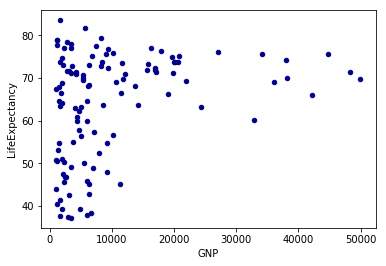

In [5]:
df2 = df_country[['GNP','LifeExpectancy']].query('(GNP < 50000) & (GNP > 1000) & (LifeExpectancy > 0)')
df2.plot(kind='scatter', x='GNP', y='LifeExpectancy', color='DarkBlue')

## Reference

##### Download MySQL Community Server
http://dev.mysql.com/downloads/mysql/

##### Install the following:
* MySQL Server
* Samples and Examples
* MySQL Workbench

### Install PyMySql python package form pip

from command prompt:  c:\>python pip install PyMySql